```
This notebook reads a netcdf file and visualizes its results

Copyright (C) 2016  SINTEF ICT

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

## Bathymetry from NetCDF

The goal of this note book is to read Bathymetry from a netcdf file, and put it into a simulator.

We use the following file:
```
wget http://thredds.met.no/thredds/ncss/fou-hi/nordic4km-1h/Nordic-4km_SURF_1h_avg_00.nc?var=h&var=latitude&var=longitude&var=mask&disableLLSubset=on&disableProjSubset=on&horizStride=1&time_start=2018-08-15T00%3A00%3A00Z&time_end=2018-08-21T00%3A00%3A00Z&timeStride=1&vertCoord=
```


In [3]:
#Lets have matplotlib "inline"
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Import packages we need
import numpy as np
from netCDF4 import Dataset
from matplotlib import animation, rc
from matplotlib import pyplot as plt
import numpy as np

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

from SWESimulators import Common, CDKLM16, SimReader

#Set large figure sizes
rc('figure', figsize=(16.0, 12.0))
rc('animation', html='html5')

In [4]:
gpu_ctx = Common.CUDAContext()

CUDA version (8, 0, 0)
Driver version 9000
Using GeForce GTX 780
 => compute capability: (3, 5)
 => memory: 3012 MB
Created context <<pycuda._driver.Context object at 0x7f28b4107050>>


In [6]:
# open a the netCDF file for reading.
filename = 'data/Nordic-4km_SURF_1h_avg_00.nc?var=h'
ncfile = Dataset(filename,'r') 

for var in ncfile.variables:
    print var

print ("\nAttributes:")    
for attr in ncfile.ncattrs():
    print attr, "\t --> ", ncfile.getncattr(attr)


h
Y
X
polar_stereographic

Attributes:
file 	 -->  /home/metno_op/run/Nordic-4km/hindcast_his.nc
type 	 -->  ROMS/TOMS history file
title 	 -->  ROMS 3.5 - Nordic-4km
rst_file 	 -->  /home/metno_op/run/Nordic-4km/hindcast_rst.nc
his_file 	 -->  /home/metno_op/run/Nordic-4km/hindcast_his.nc
avg_file 	 -->  /home/metno_op/run/Nordic-4km/hindcast_avg.nc
sta_file 	 -->  /home/metno_op/run/Nordic-4km/hindcast_sta.nc
grd_file 	 -->  /home/metno_op/sea/ROMS/Suite/Apps/Common/Grid/nordic-4km_grd.nc
ini_file 	 -->  /home/metno_op/run/Nordic-4km/ocean_ini.nc
frc_file_01 	 -->  /home/metno_op/run/Nordic-4km/ocean_force.nc
frc_file_02 	 -->  /home/metno_op/run/Nordic-4km/tide.nc
frc_file_03 	 -->  /home/metno_op/run/Nordic-4km/ostia_sst.nc
frc_file_04 	 -->  /home/metno_op/sea/ROMS/Suite/Apps/Common/Origfiles/Nordic-4km_rivers.nc
bry_file 	 -->  /home/metno_op/run/Nordic-4km/ocean_bry.nc
clm_file 	 -->  /home/metno_op/run/Nordic-4km/ocean_clm.nc
script_file 	 -->  /home/metno_op/run/Nordic-4km/rom

In [26]:
X = ncfile.variables['X']
Y = ncfile.variables['Y']
H = ncfile.variables['h']

('shapes: ', (1021,), (578,), (578, 1021))
('min/max H: ', 10.0, 4810.0)
<type 'numpy.ndarray'>


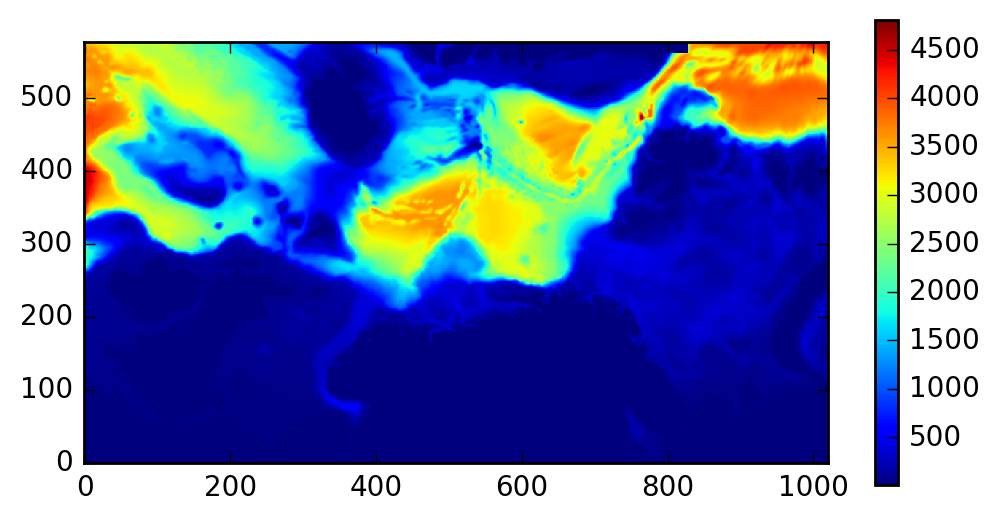

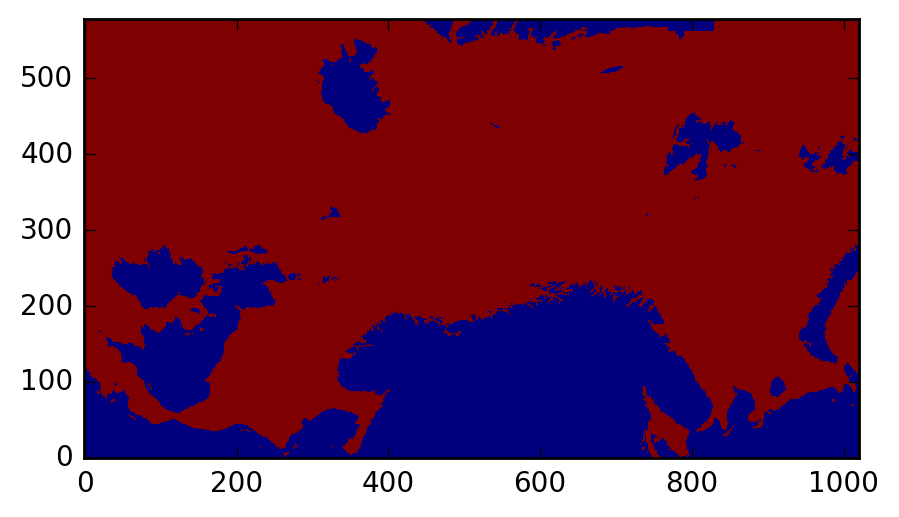

In [41]:
print( "shapes: ", X.shape, Y.shape, H.shape)
print( "min/max H: ", np.min(H), np.max(H))
fig = plt.figure(figsize=(6,3))
plt.imshow(H, interpolation="None", origin='lower')
plt.colorbar()

npH = np.array(H)

posH = npH > 15
print type(posH)
fig = plt.figure(figsize=(5, 3))
plt.imshow(posH , interpolation="None", origin='lower')


shape H_chunk: (278, 300)
('(min, max) of section: ', (67.0, 4577.0))


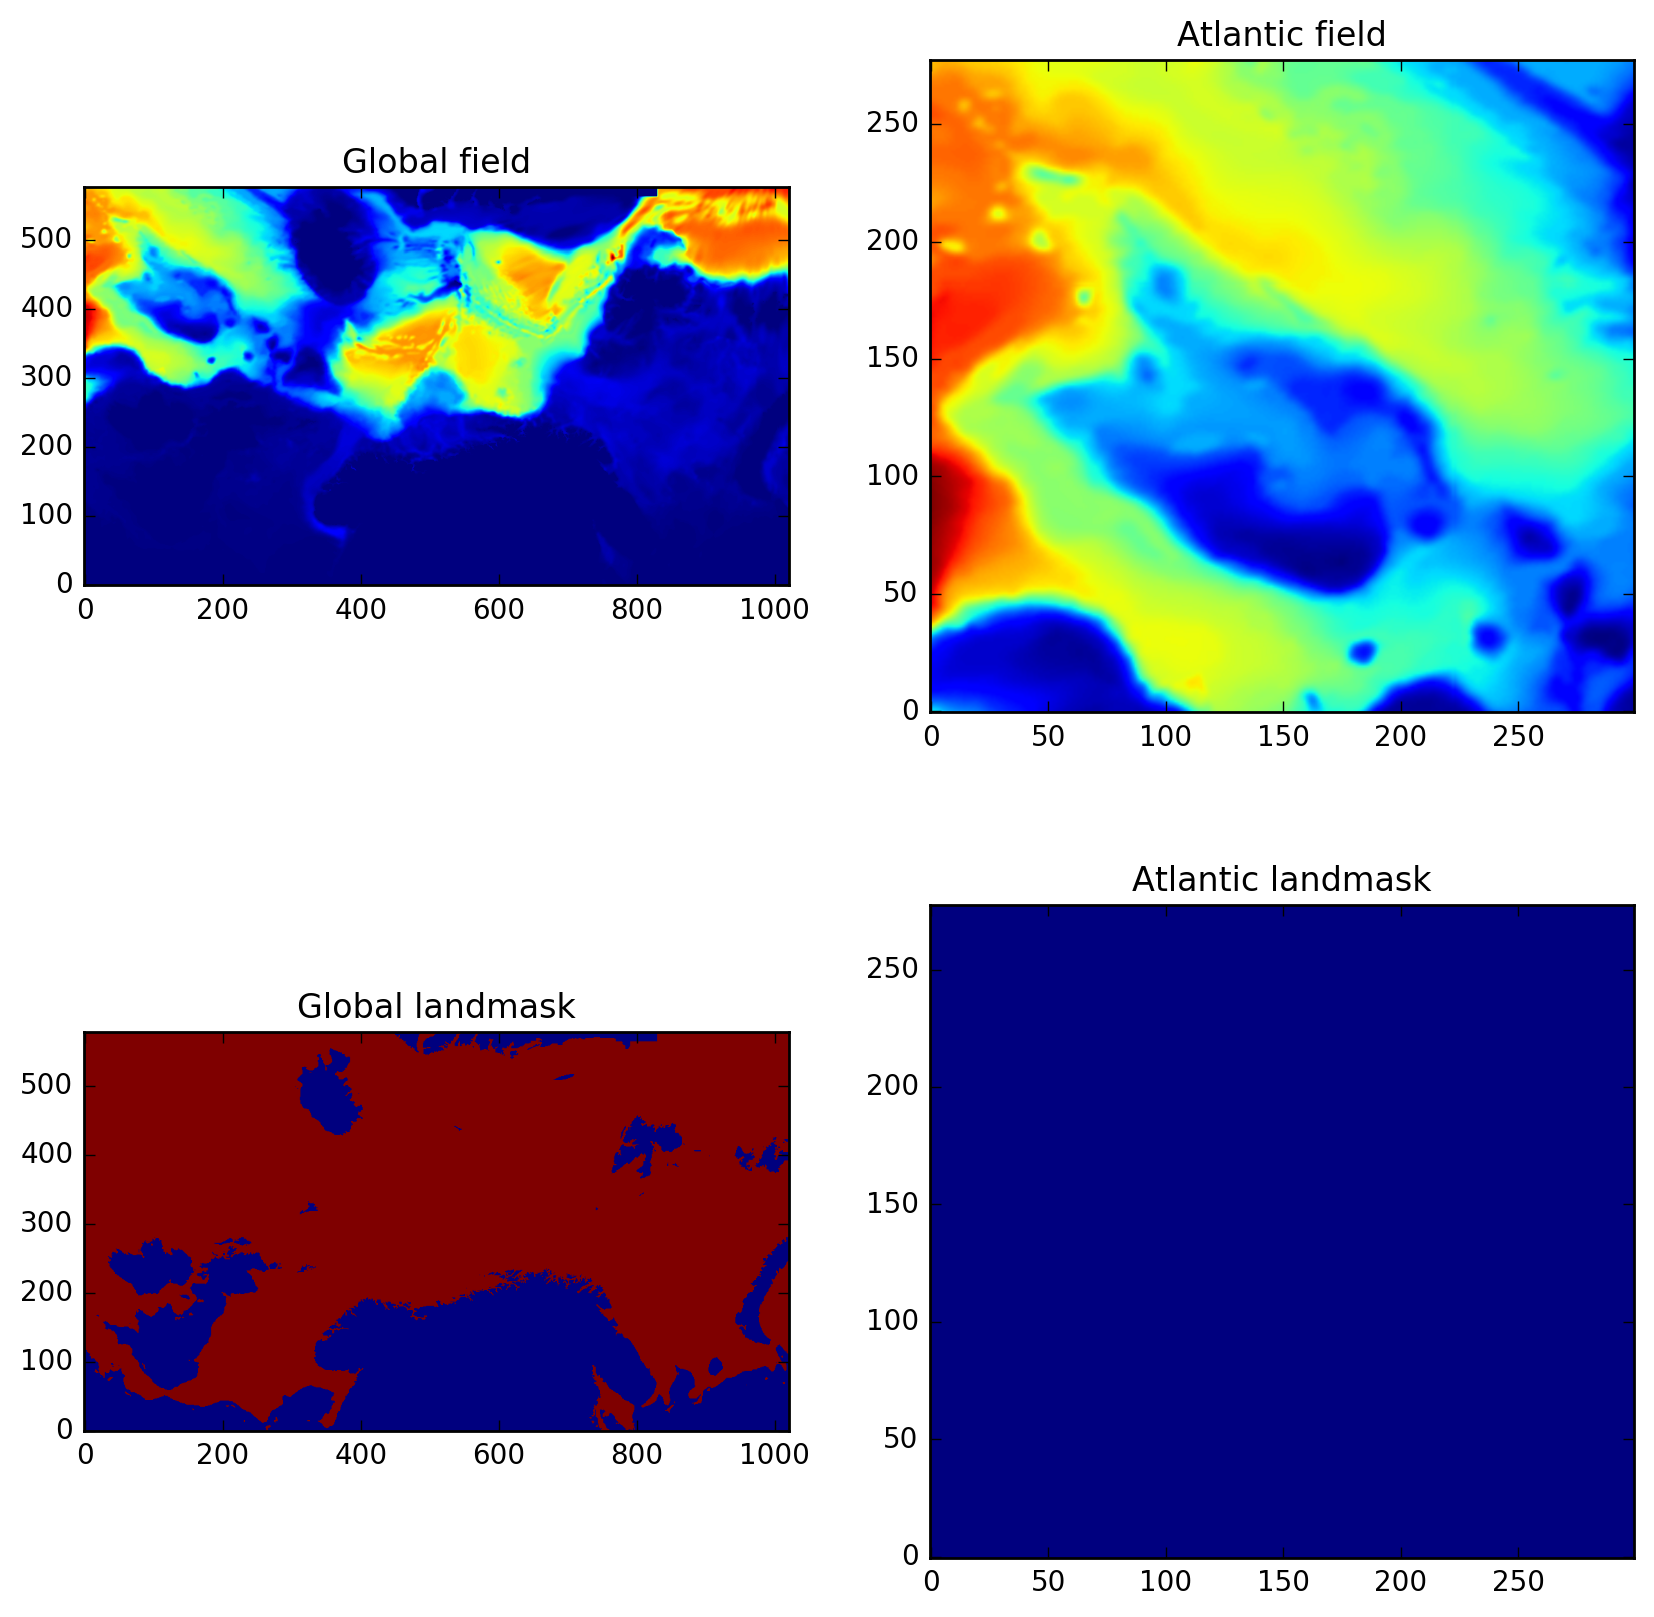

In [57]:
# Obtaining chunk of ocean between UK and Iceland

startX = 0
endY = 578

startY = 300
endX = 300

def plotChunk(H, startX, endX, startY, endY, chunkTitle="Chunk"):
    H_chunk = H[startY:endY, startX:endX]
    print "shape H_chunk:", H_chunk.shape
    
    fig = plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.imshow(H, origin='lower')
    plt.title("Global field")
    
    plt.subplot(2,2,3)
    plt.imshow(H > 15, origin='lower')
    plt.title("Global landmask")
    
    plt.subplot(2,2,2)
    plt.imshow(H_chunk, origin='lower')
    plt.title(chunkTitle + " field")
    
    plt.subplot(2,2,4)
    plt.imshow(H_chunk > 15, origin='lower')
    plt.title(chunkTitle + " landmask")
    
    print( "(min, max) of section: ", (np.min(H_chunk), np.max(H_chunk)))
    
plotChunk(npH, startX, endX, startY, endY, "Atlantic")
    


shape H_chunk: (180, 390)
('(min, max) of section: ', (24.0, 3703.0))


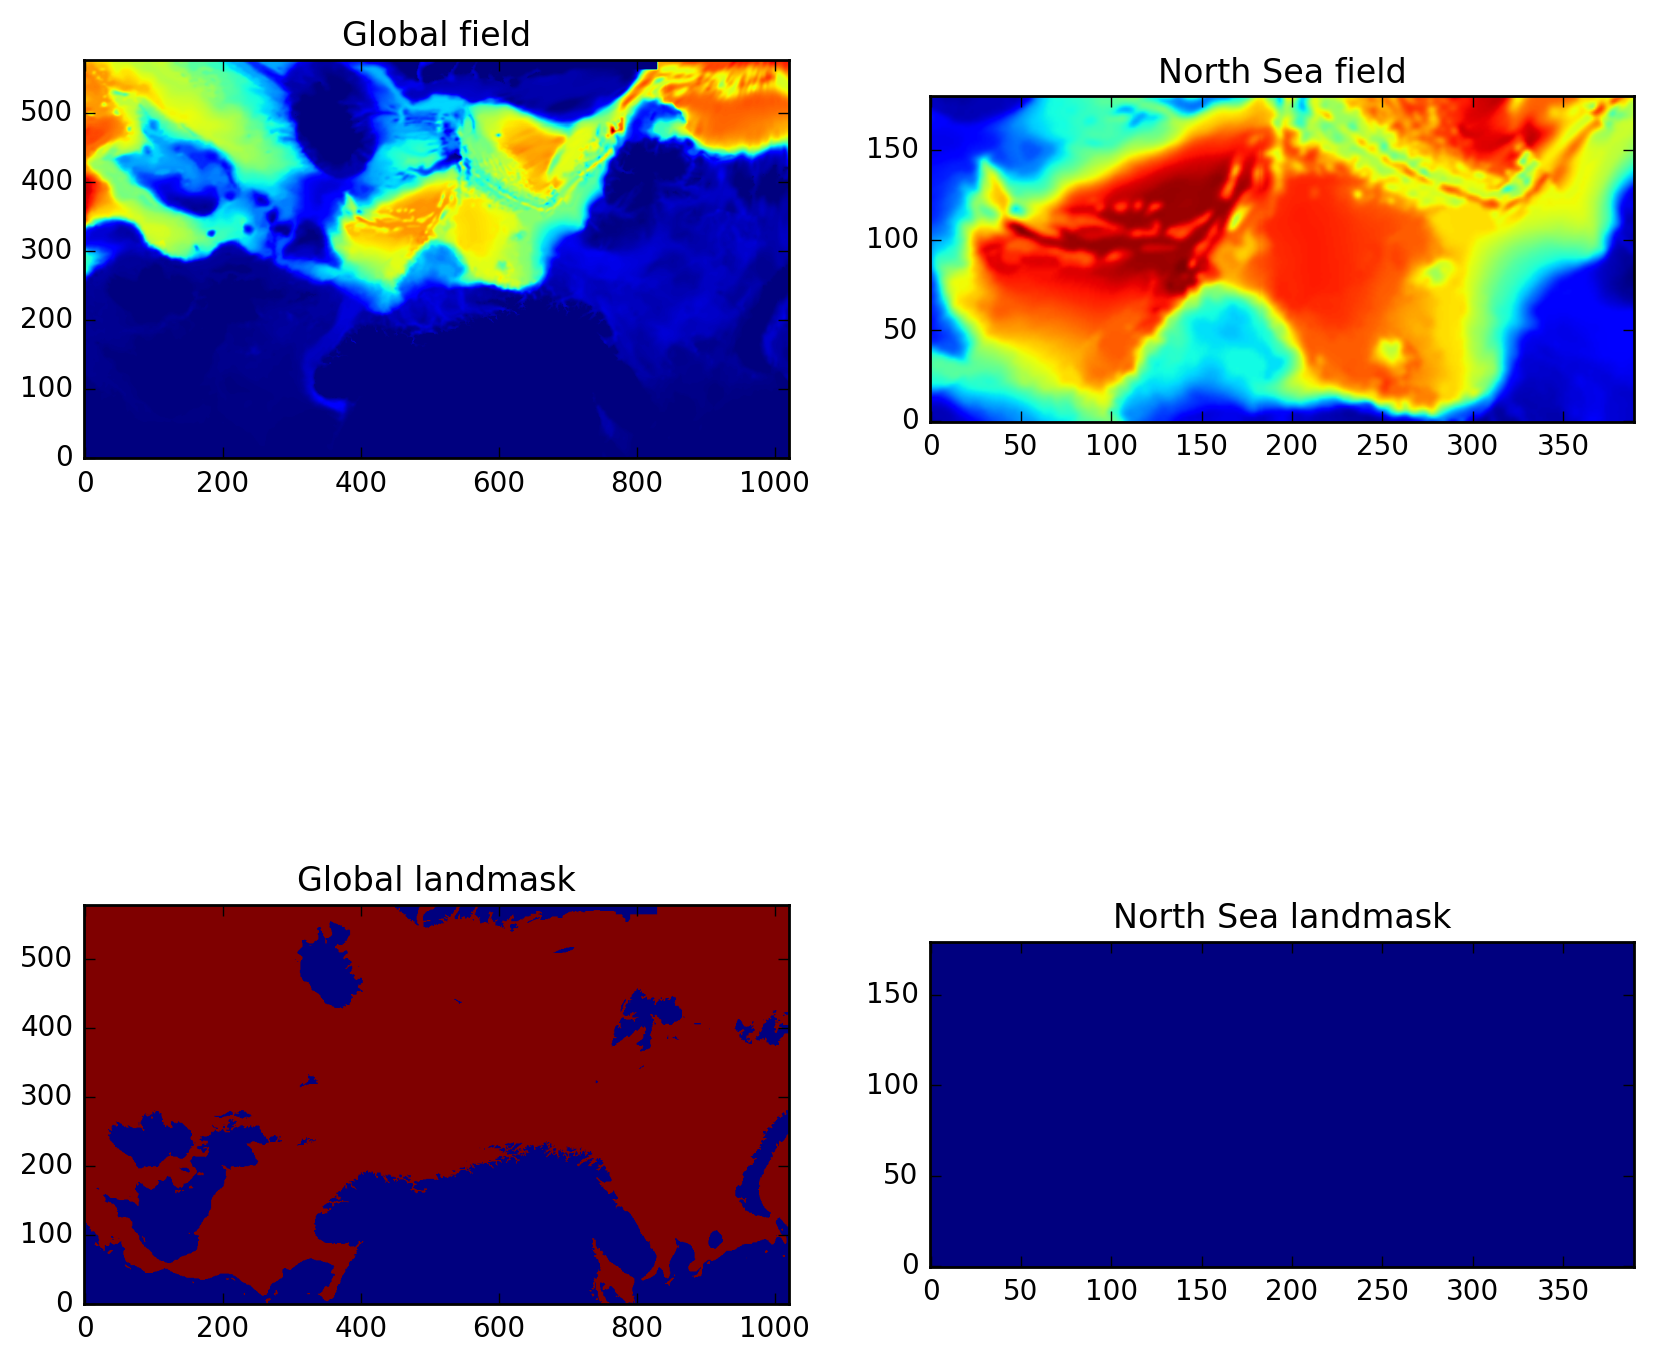

In [64]:
# Obtaining chunk of the North Sea

startX = 350
endX = 740

startY = 240
endY = 420

plotChunk(npH, startX, endX, startY, endY, "North Sea")
    


In [4]:
ncfile.close()